In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sklearn 
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, KFold
import random
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [2]:
companyB = pd.read_csv('CompanyBData.csv')

As shown below we have no rows with missing values

In [3]:
companyB.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

#### Count how many unique values are in state and area code columns

In [4]:
companyB.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

# Reasons for customers leaving

### Categorical variables

There are a total of 3333 customers and 483 are churn giving a 14.49% churn rate

Does churn vary by state, area code

In [5]:
companyB.groupby(['Churn']).count()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,,,,
False,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850
True,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483


#### States churn rates

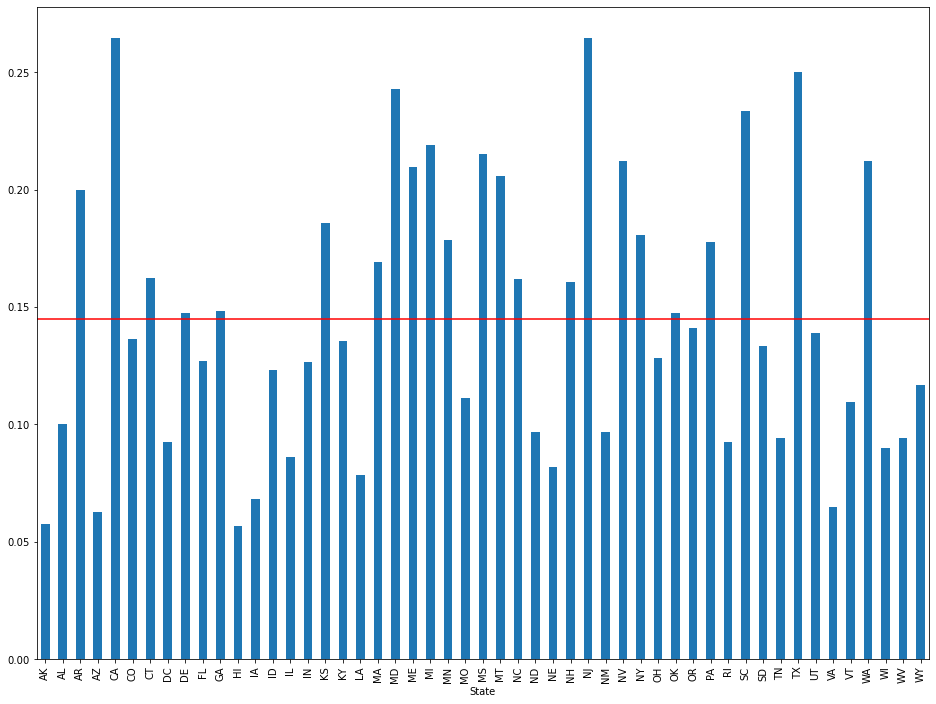

In [6]:
states_churn = companyB.groupby(['State'])['Churn'].mean().copy()
states_churn_plot = states_churn.plot.bar(figsize=(16, 12))
states_churn_plot.axhline(y=0.1449, color='red')


It looks like state is an important variable when determining churn, would be worth adding to model. Perhaps could replace state column values with the churn rate of each state in order to keep it to one column ?

#### Area code churn rates

In [7]:
companyB.groupby(['Area code'])['Churn'].mean()

Area code
408    0.145585
415    0.142598
510    0.148810
Name: Churn, dtype: float64

Churn rate does not appear to vary by area code and so we can reasonably conclude this variable is not important and will be dropped

### Boolean variables

Does churn rate vary depending on whether customer has international plan or voice mail plan?

#### International plan

Text(0, 0.5, 'Churn rate')

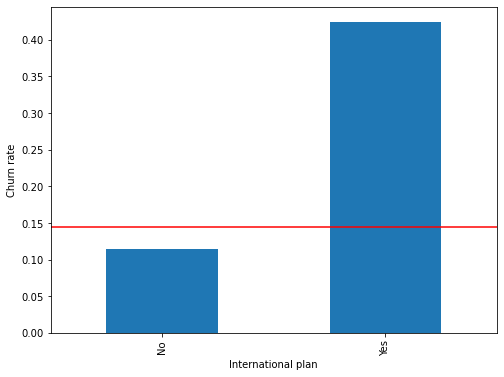

In [8]:
bools_churn = companyB[['International plan', 'Voice mail plan', 'Churn']]

int_plan_plot = bools_churn.groupby(['International plan'])['Churn'].mean().plot.bar(y='Churn rate',figsize=(8, 6))
int_plan_plot.set_ylabel('Churn rate')
int_plan_plot.axhline(y=0.1449, color='red')

#### Voice mail plan

Text(0, 0.5, 'Churn rate')

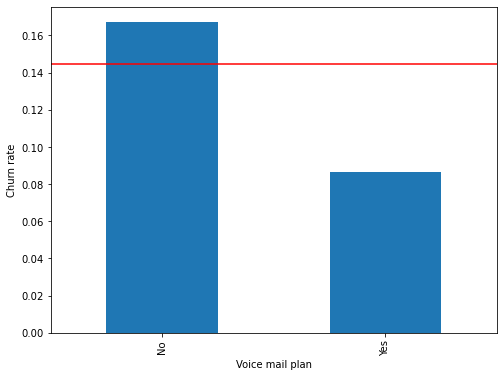

In [9]:
voice_plan_plot = bools_churn.groupby(['Voice mail plan'])['Churn'].mean().plot.bar(y='Churn rate',figsize=(8, 6))
voice_plan_plot.set_ylabel('Churn rate')
voice_plan_plot.axhline(y=0.1449, color='red')

### Numeric values

Comparing numeric values to churn rate 

In [10]:
companyB_numeric = companyB.copy()
companyB_numeric = companyB_numeric.drop(['State', 'Area code', 'International plan','Voice mail plan'],axis=1)

In [11]:
companyB_numeric.groupby('Churn').mean()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,
False,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


### Andrew Stats

In [14]:
#International plan y/n churn rates
bools_churn.groupby(['International plan'])['Churn'].mean()
#california and hawaii churn rates
companyB.groupby(['State'])['Churn'].mean()

International plan
No     0.114950
Yes    0.424149
Name: Churn, dtype: float64

State
AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
CO    0.136364
CT    0.162162
DC    0.092593
DE    0.147541
FL    0.126984
GA    0.148148
HI    0.056604
IA    0.068182
ID    0.123288
IL    0.086207
IN    0.126761
KS    0.185714
KY    0.135593
LA    0.078431
MA    0.169231
MD    0.242857
ME    0.209677
MI    0.219178
MN    0.178571
MO    0.111111
MS    0.215385
MT    0.205882
NC    0.161765
ND    0.096774
NE    0.081967
NH    0.160714
NJ    0.264706
NM    0.096774
NV    0.212121
NY    0.180723
OH    0.128205
OK    0.147541
OR    0.141026
PA    0.177778
RI    0.092308
SC    0.233333
SD    0.133333
TN    0.094340
TX    0.250000
UT    0.138889
VA    0.064935
VT    0.109589
WA    0.212121
WI    0.089744
WV    0.094340
WY    0.116883
Name: Churn, dtype: float64

# Data Cleaning

In [12]:
yFull = companyB['Churn'].copy()
xdirty = companyB.copy()
del xdirty['Churn']
del xdirty['Area code']
del xdirty['International plan']
del xdirty['Voice mail plan']

#### Sort out binary columns (International plan and Voice mail plan)

In [13]:
binary_cols = companyB[['International plan','Voice mail plan']].copy()
binary_cols['International plan'] = binary_cols['International plan'].map({'No':0, 'Yes':1})
binary_cols['Voice mail plan'] = binary_cols['Voice mail plan'].map({'No':0, 'Yes':1})

#### Transforming state column to show churn rate for that state

In [14]:
states_test = companyB[['State','Churn']]

#Turn series into dictionary
states_churn = companyB.groupby(['State'])['Churn'].mean().copy()
states_churn_dictionary = states_churn.to_dict()
xdirty = xdirty.replace({'State':states_churn_dictionary})

#### Scaling

In [15]:
x_scale = xdirty.drop('State',axis=1)
x_scale_attribs = list(x_scale)

std_scaler = preprocessing.StandardScaler()
x_scale[x_scale_attribs] = std_scaler.fit_transform(x_scale[x_scale_attribs])

x_clean = x_scale.copy()

In [16]:
x_clean = x_clean.join(xdirty['State'])

#### Rejoin scaled values with binary columns 

In [17]:
x_clean = x_clean.join(binary_cols)

#### Convert churn values into 0 or 1

In [18]:
yFull = yFull.map({False:0, True:1})

#### Join yFull and x_clean then transform into numpy array

In [19]:
companyB_combined = x_clean.join(yFull).copy()
companyB_combined = companyB_combined.to_numpy()
companyB_combined.shape

(3333, 19)

So the array has 19 values per row, one of which being the dependent variable. 3333 rows

# Notes

In [20]:
#3333 values so say 600 are test and then 300 are validation

testFull = companyB_combined[:600].copy()
trainFull = companyB_combined[600:].copy()
#validationFull = companyB_combined[3000:].copy()
trainFull.shape
testFull.shape


xTest = testFull[:,0:18]
yTest = testFull[:,18]

xTrain = trainFull[:,0:18]
yTrain = trainFull[:,18]

#xValidation = validationFull[:,0:17]
#yValidation = validationFull[:,17]

(2733, 19)

(600, 19)

# Base NN

In [21]:
#Create empty arrays to hold metrics
train_accuracy_array = []
train_recall_array = []
train_precision_array = []

test_accuracy_array = []
test_recall_array = []
test_precision_array = []

for i in range(0,10):
    def build_model(n_hidden=3, n_neurons = 30, learn=3e-3, dropout_rate=0.04):
        model = keras.models.Sequential()
        model.add(keras.layers.InputLayer(input_shape=[18]))
        for layer in range(n_hidden):
            model.add(keras.layers.Dropout(dropout_rate))
            model.add(keras.layers.Dense(n_neurons, activation="selu",kernel_initializer="lecun_normal"))
        model.add(keras.layers.Dense(1, activation="sigmoid"))
        opt = keras.optimizers.Nadam(learning_rate=learn)
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return model

    keras_classifier = keras.wrappers.scikit_learn.KerasRegressor(build_model)
    early_stopping = EarlyStopping(patience = 20, restore_best_weights=True)
    model = keras_classifier.fit(xTrain, yTrain, epochs=1, batch_size=8,validation_data=(xTest, yTest),callbacks=[early_stopping])
    
    #get predictions for xtrain and x test
    y_pred_train = keras_classifier.predict(xTrain)
    y_pred_test = keras_classifier.predict(xTest)
    
    #Get metrics
    train_acc = accuracy_score(yTrain , np.rint(y_pred_train))*100
    train_recall = recall_score(yTrain , np.rint(y_pred_train))
    train_prec = precision_score(yTrain , np.rint(y_pred_train))*100
    
    test_acc = accuracy_score(yTest , np.rint(y_pred_test))*100
    test_recall = recall_score(yTest , np.rint(y_pred_test))
    test_prec = precision_score(yTest , np.rint(y_pred_test))*100
    
    #Insert metrics into relevant arrays
    train_accuracy_array.append(train_acc)
    train_recall_array.append(train_recall)
    train_precision_array.append(train_prec)
    
    test_accuracy_array.append(test_acc)
    test_recall_array.append(test_recall)
    test_precision_array.append(test_prec)

342/342 [==============================] - 1s 1ms/step - loss: 0.4042 - accuracy: 0.8237 - val_loss: 0.2482 - val_accuracy: 0.9083


# Get average of each metric from base NN

In [22]:
#Create function to get the average of a list
def avg_list(x):
    return sum(x) / len(x)


In [23]:
print('Mean train accuracy: ' + str(avg_list(train_accuracy_array)))
print('Mean train recall: ' + str(avg_list(train_recall_array)))
print('Mean train precision: ' + str(avg_list(train_precision_array)))

print('Mean test accuracy: ' + str(avg_list(test_accuracy_array)))
print('Mean test recall: ' + str(avg_list(test_recall_array)))
print('Mean test precision: ' + str(avg_list(test_precision_array)))

Mean train accuracy: 90.09879253567509
Mean train recall: 0.44961832061068707
Mean train precision: 76.99954914867632
Mean test accuracy: 89.29999999999998
Mean test recall: 0.4211111111111111
Mean test precision: 76.21465732543498


#### Randomized Search

#### Metrics, Confusion matrices and learning curves

These metrics are for last model loop above

We argue that the most important part of the confusion matrix is the bottom left corner which shows churn that was not identified as these are customers lost, top right shows non-churn who were mistaken for churn (and so perhaps sent a deal) however the cost of this is worth it.

array([[2267,   73],
       [ 173,  220]], dtype=int64)

Train accuracy: 90.99890230515916
Train recall: 0.5597964376590331
Train precision: 75.0853242320819


array([[493,  17],
       [ 38,  52]], dtype=int64)

Test accuracy: 90.83333333333333
Test recall: 0.5777777777777777
Test precision: 75.36231884057972


(0.0, 1.0)

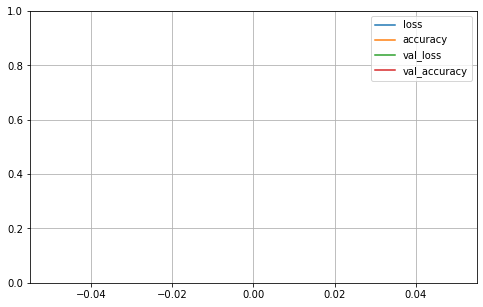

In [24]:
#Confusion matrix for train
y_pred_train = keras_classifier.predict(xTrain)
confusion_matrix_train = sklearn.metrics.confusion_matrix(yTrain, np.rint(y_pred_train))
confusion_matrix_train


print('Train accuracy: ' + str(accuracy_score(yTrain , np.rint(y_pred_train))*100))
print('Train recall: ' + str(recall_score(yTrain , np.rint(y_pred_train))))
print('Train precision: ' + str(precision_score(yTrain , np.rint(y_pred_train))*100))


# Confusion matrix for test
y_pred = keras_classifier.predict(xTest)
confusion_matrix = sklearn.metrics.confusion_matrix(yTest, np.rint(y_pred))
confusion_matrix

print('Test accuracy: ' + str(accuracy_score(yTest, np.rint(y_pred))*100))
print('Test recall: ' + str(recall_score(yTest, np.rint(y_pred))))
print('Test precision: ' + str(precision_score(yTest , np.rint(y_pred))*100))

#Learning curves
pd.DataFrame(model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# NN with class weights

In [25]:
#Set class weights
train_acc_master = []
train_recall_master = []
train_prec_master = []

test_acc_master = []
test_recall_master = []
test_prec_master = []

for x in range(6,12):
    print(x)
    class_weight = {0: 1.,
                    1: x }

    #Create empty arrays to hold metrics
    train_accuracy_array_2 = []
    train_recall_array_2 = []
    train_precision_array_2 = []

    test_accuracy_array_2 = []
    test_recall_array_2 = []
    test_precision_array_2 = []


    for i in range(0,20):
        #Create function to build model
        def build_model_2(n_hidden=3, n_neurons = 30, learn=3e-3, dropout_rate=0.04):
            model = keras.models.Sequential()
            model.add(keras.layers.InputLayer(input_shape=[18]))
            for layer in range(n_hidden):
                model.add(keras.layers.Dropout(dropout_rate))
                model.add(keras.layers.Dense(n_neurons, activation="selu",kernel_initializer="lecun_normal"))
            model.add(keras.layers.Dense(1, activation="sigmoid"))
            opt = keras.optimizers.Nadam(learning_rate=learn)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            return model


        #Create Keras regressor based on this build
        keras_classifier_2 = keras.wrappers.scikit_learn.KerasRegressor(build_model_2)
        early_stopping = EarlyStopping(patience = 20, restore_best_weights=True)
        model_2 = keras_classifier_2.fit(xTrain, yTrain, epochs=100, batch_size=8,validation_data=(xTest, yTest),callbacks=[early_stopping],class_weight=class_weight)

        #get predictions for xtrain and x test
        y_pred_train_2 = keras_classifier_2.predict(xTrain)
        y_pred_test_2 = keras_classifier_2.predict(xTest)

        #Get metrics
        train_acc_2 = accuracy_score(yTrain , np.rint(y_pred_train_2))*100
        train_recall_2 = recall_score(yTrain , np.rint(y_pred_train_2))*100
        train_prec_2 = precision_score(yTrain , np.rint(y_pred_train_2))*100

        test_acc_2 = accuracy_score(yTest , np.rint(y_pred_test_2))*100
        test_recall_2 = recall_score(yTest , np.rint(y_pred_test_2))*100
        test_prec_2 = precision_score(yTest , np.rint(y_pred_test_2))*100

        #Insert metrics into relevant arrays
        train_accuracy_array_2.append(train_acc_2)
        train_recall_array_2.append(train_recall_2)
        train_precision_array_2.append(train_prec_2)

        test_accuracy_array_2.append(test_acc_2)
        test_recall_array_2.append(test_recall_2)
        test_precision_array_2.append(test_prec_2)
    
    #Get mean value of each metric 
    train_mean_acc = avg_list(train_accuracy_array_2)
    train_mean_recall = avg_list(train_recall_array_2)
    train_mean_prec = avg_list(train_precision_array_2)
    
    test_mean_acc = avg_list(test_accuracy_array_2)
    test_mean_recall = avg_list(test_recall_array_2)
    test_mean_prec = avg_list(test_precision_array_2)
    
    #Insert mean values into master array
    train_acc_master.append(train_mean_acc)
    train_recall_master.append(train_mean_recall)
    train_prec_master.append(train_mean_prec)

    test_acc_master.append(test_mean_acc)
    test_recall_master.append(test_mean_recall)
    test_prec_master.append(test_mean_prec)

6
Epoch 1/100
342/342 [==============================] - 1s 1ms/step - loss: 1.0617 - accuracy: 0.6807 - val_loss: 0.4298 - val_accuracy: 0.8100
Epoch 2/100
342/342 [==============================] - 0s 748us/step - loss: 0.8493 - accuracy: 0.7892 - val_loss: 0.3545 - val_accuracy: 0.8583
Epoch 3/100
342/342 [==============================] - 0s 776us/step - loss: 0.7234 - accuracy: 0.8403 - val_loss: 0.3585 - val_accuracy: 0.8800
Epoch 4/100
342/342 [==============================] - 0s 750us/step - loss: 0.7301 - accuracy: 0.8412 - val_loss: 0.3864 - val_accuracy: 0.8600
Epoch 5/100
342/342 [==============================] - 0s 760us/step - loss: 0.6601 - accuracy: 0.8588 - val_loss: 0.4066 - val_accuracy: 0.8450
Epoch 6/100
342/342 [==============================] - 0s 751us/step - loss: 0.6404 - accuracy: 0.8566 - val_loss: 0.4294 - val_accuracy: 0.8450
Epoch 7/100
342/342 [==============================] - 0s 754us/step - loss: 0.6851 - accuracy: 0.8498 - val_loss: 0.2734 - val_ac

In [26]:
for i in range(1, len(train_acc_master)+1):
    x=i-1
    print('1:' +str(i) +' Training Accuracy = ' + str(train_acc_master[x]))
    print('1:' +str(i) +' Training Recall = ' + str(train_recall_master[x]))
    print('1:' +str(i) +' Training Precision = ' + str(train_prec_master[x]))
    print('1:' +str(i) +' Test Accuracy = ' + str(test_acc_master[x]))
    print('1:' +str(i) +' Test Recall = ' + str(test_recall_master[x]))
    print('1:' +str(i) +' Test Precision = ' + str(test_prec_master[x]))
    print('')
    print('')

1:1 Training Accuracy = 95.05122575923893
1:1 Training Recall = 87.39185750636132
1:1 Training Precision = 80.57199210614803
1:1 Test Accuracy = 93.12500000000001
1:1 Test Recall = 79.88888888888889
1:1 Test Precision = 76.15818571972707


1:2 Training Accuracy = 94.86644712769848
1:2 Training Recall = 87.98982188295167
1:2 Training Precision = 79.1077103698233
1:2 Test Accuracy = 92.95833333333334
1:2 Test Recall = 81.0
1:2 Test Precision = 74.81599655062638


1:3 Training Accuracy = 94.11452616172704
1:3 Training Recall = 89.058524173028
1:3 Training Precision = 75.09596792662505
1:3 Test Accuracy = 92.15833333333333
1:3 Test Recall = 81.33333333333333
1:3 Test Precision = 71.09619468434752


1:4 Training Accuracy = 93.38638858397364
1:4 Training Recall = 90.45801526717558
1:4 Training Precision = 71.708422317583
1:4 Test Accuracy = 90.45000000000002
1:4 Test Recall = 82.0
1:4 Test Precision = 64.77076069143624


1:5 Training Accuracy = 92.53018660812293
1:5 Training Recall = 89.5547

In [27]:
print('Mean train accuracy: ' + str(avg_list(train_accuracy_array_2)))
print('Mean train recall: ' + str(avg_list(train_recall_array_2)))
print('Mean train precision: ' + str(avg_list(train_precision_array_2)))

print('Mean test accuracy: ' + str(avg_list(test_accuracy_array_2)))
print('Mean test recall: ' + str(avg_list(test_recall_array_2)))
print('Mean test precision: ' + str(avg_list(test_precision_array_2)))

Mean train accuracy: 91.71789242590557
Mean train recall: 90.07633587786259
Mean train precision: 66.07824676976057
Mean test accuracy: 89.55833333333332
Mean test recall: 82.66666666666666
Mean test precision: 61.692787589857176


array([[2210,  130],
       [  30,  363]], dtype=int64)

Train accuracy: 94.14562751555067
Train recall: 0.9236641221374046


array([[474,  36],
       [ 17,  73]], dtype=int64)

Test accuracy: 91.16666666666666
Test recall: 0.8111111111111111


(0.0, 1.0)

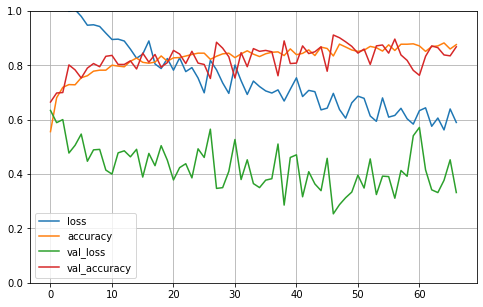

In [28]:
#Confusion matrix for train
y_pred_train = keras_classifier_2.predict(xTrain)
confusion_matrix_train = sklearn.metrics.confusion_matrix(yTrain, np.rint(y_pred_train))
confusion_matrix_train


print('Train accuracy: ' + str(accuracy_score(yTrain , np.rint(y_pred_train))*100))
print('Train recall: ' + str(recall_score(yTrain , np.rint(y_pred_train))))


# Confusion matrix for test
y_pred = keras_classifier_2.predict(xTest)
confusion_matrix = sklearn.metrics.confusion_matrix(yTest, np.rint(y_pred))
confusion_matrix

print('Test accuracy: ' + str(accuracy_score(yTest, np.rint(y_pred))*100))
print('Test recall: ' + str(recall_score(yTest, np.rint(y_pred))))

#Learning curves
pd.DataFrame(model_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()